## Linear regression with Python 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 0 : Importing the data

In [2]:
df = pd.read_csv('Ecommerce Customers')

### Step 1 : Understanding the data

In [3]:
df.shape

(500, 8)

In [4]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


The data has 500 rows and 8 columns. The average session length, time on app and time on website, length of membership and yearly amount spent is the numerical value we have and others are object.

The standard deviation is less for the amount of time spent on app and webiste shows that most users spent similar amount of time.

### Step 2 : Data preparation

In [7]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
df1 = df[[#'Email', 'Address', 'Avatar', 
    'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

df1.shape

(500, 5)

In [9]:
df1 = df1.rename(columns = {'Avg. Session Length' : 'Avg_session' ,
                            'Time on App' : 'App_usage_time',
                            'Time on Website' : 'Web_usage_time' ,
                            'Length of Membership': 'Membership_length',
                            'Yearly Amount Spent' : 'Amt_spent_yearly'})

In [10]:
df1.head()

,Avg_session,App_usage_time,Web_usage_time,Membership_length,Amt_spent_yearly
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df1.isna().sum()

Avg_session          0
App_usage_time       0
Web_usage_time       0
Membership_length    0
Amt_spent_yearly     0
dtype: int64

In [12]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

Columns are renamed with non-white space as it is one of the most common error that makes debugging complex. Also, there is no data missing and no columns are duplicated.

### Step 3 : Feature Understanding

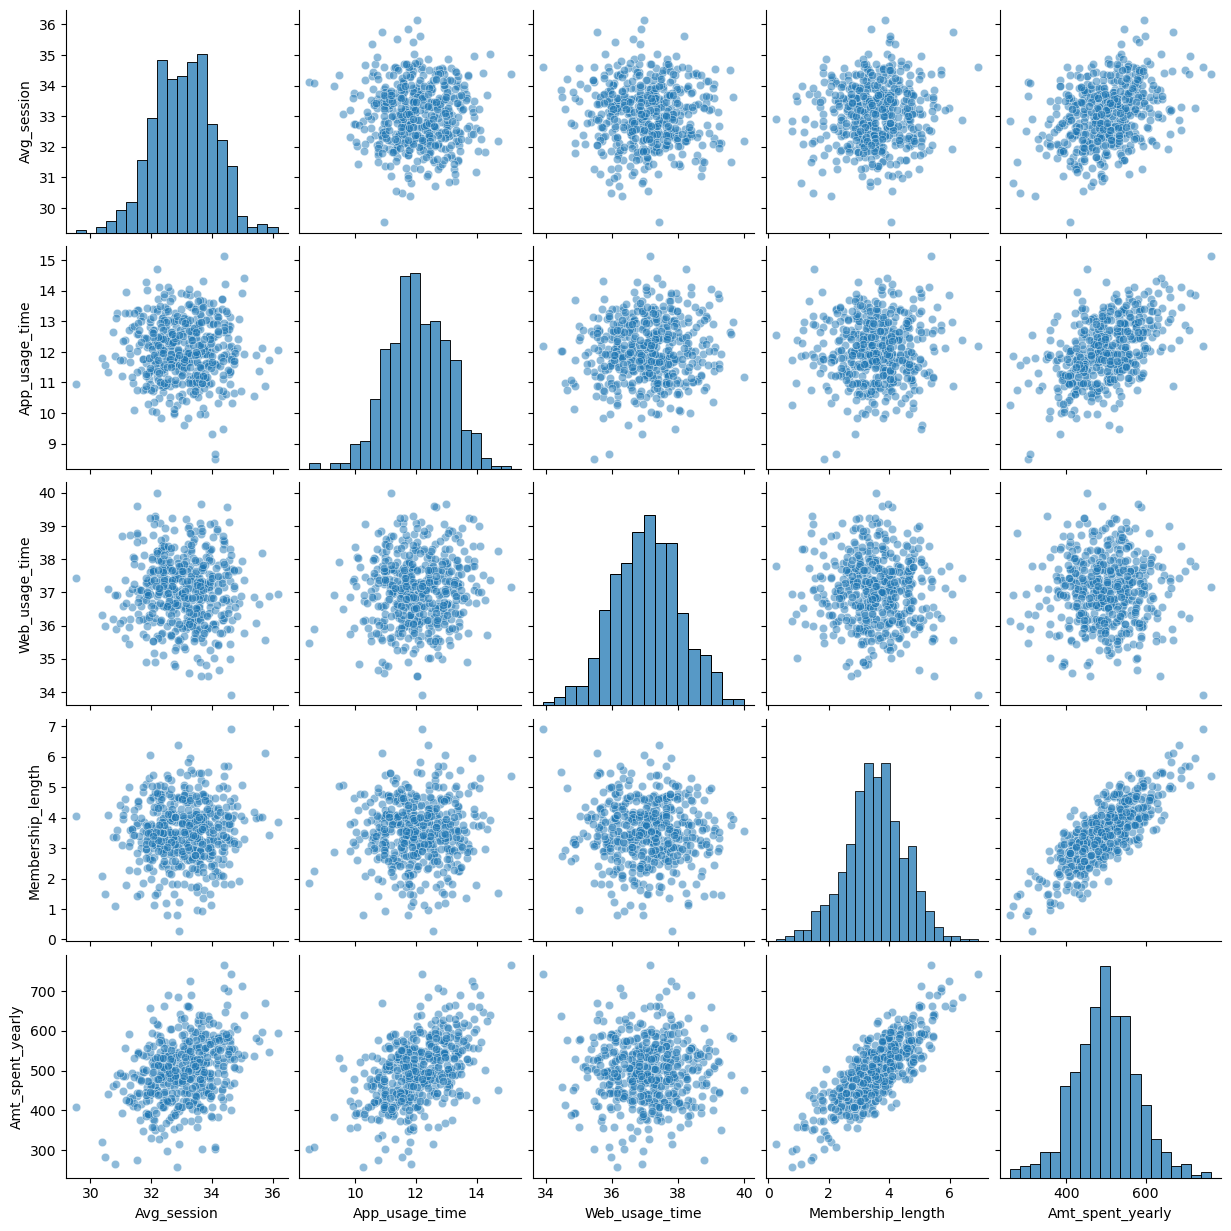

In [13]:
sns.pairplot(df1, kind='scatter', plot_kws = {'alpha' : 0.5})

In [14]:
df1_corr = df1[['Avg_session', 'App_usage_time', 'Web_usage_time', 'Membership_length',
       'Amt_spent_yearly']].corr()

df1_corr

,Avg_session,App_usage_time,Web_usage_time,Membership_length,Amt_spent_yearly
Avg_session,1.000000,-0.027826,-0.034987,0.060247,0.355088
App_usage_time,-0.027826,1.000000,0.082388,0.029143,0.499328
Web_usage_time,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Membership_length,0.060247,0.029143,-0.047582,1.000000,0.809084
Amt_spent_yearly,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

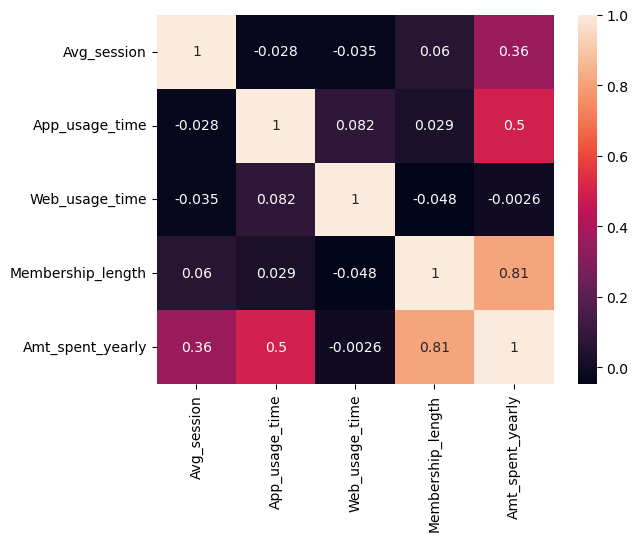

In [15]:
sns.heatmap(df1_corr, annot = True)

The correlation between the features clearly show that the Membership length is directly related to increase in amount spent yearly by customer.

### Step 4 : Applying linear regression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df1[['Avg_session', 'App_usage_time', 'Web_usage_time', 'Membership_length',
       ]]
y = df1['Amt_spent_yearly']

In [18]:
X.shape, y.shape

((500, 4), (500,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                     random_state = 90)

In [20]:
X_train.shape , X_test.shape

((350, 4), (150, 4))

### Training the model (Scikit - learn)

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
lm.coef_

array([25.43776186, 38.78022236,  0.43908034, 61.66313786])

In [24]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
print(cdf)

                        Coef
Avg_session        25.437762
App_usage_time     38.780222
Web_usage_time      0.439080
Membership_length  61.663138


In [25]:
# Predictions 

predictions = lm.predict(X_test)

<Axes: ylabel='Amt_spent_yearly'>

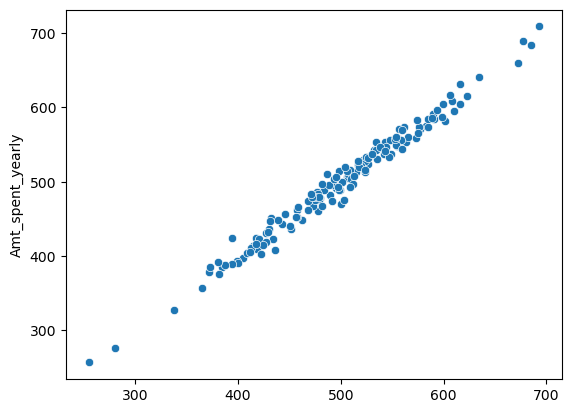

In [26]:
sns.scatterplot(x = predictions, y = y_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Squared Error :", mean_squared_error(y_test, predictions))
print("Mean Absolute Error :", mean_absolute_error(y_test, predictions))

Mean Squared Error : 104.9388975231156
Mean Absolute Error : 8.303880068603704


#### Let us check residuals

In [29]:
residuals = y_test - predictions
residuals

51     -0.139446
48      6.549603
223     5.177977
254    -7.323114
118     0.710295
         ...    
319     2.684650
34     -5.621769
226     8.655391
479   -20.404288
471    -1.745749
Name: Amt_spent_yearly, Length: 150, dtype: float64

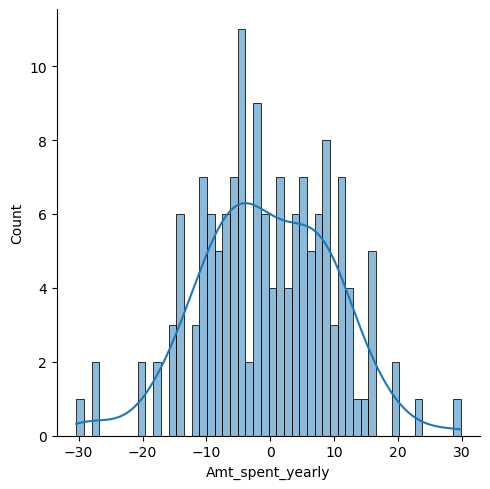

In [33]:
sns.displot(residuals, bins = 50, kde = True)

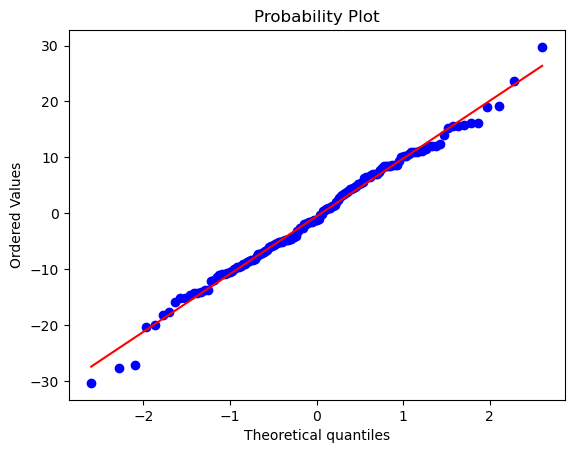

In [34]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show() 